# Assignment 1 : Question 2

## Question

Consider the training dataset data.csv, which has 8 variables, as follows.
"NumPreg","PlasmaGlucose", "DiastolicBP", "TricepSkin", "BodyMassIndex" ,"Pedigree"
"Age", "Diabetic"
The target is to fit a logistic regression model to predict the "Diabetic" variable based on the other 7
variables. In this connection, please answer the following questions, in given sequence.
1. Develop the best model to predict the categorical response variable "Diabetic" in case of the
given dataset? Justify your choice for best model.
2. Suppose you have chosen a threshold t to classify P(Diabetic | X) > t as "Diabetic" = Yes. How
would you choose the optimal threshold t such that the aforesaid classification achieves maximum
accuracy for your best model? Justify your choice.

## The Solution

### Importing the Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn

### Splitting the data into features and labels and encoding the labels

In [127]:
df = pd.read_csv('data.csv')
x = df.iloc[:,0:7].values
y = df.iloc[:,7].values

#encoding
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y) # All rows and first column i.e country column
y

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1])

### Normalizing the features with Standard Scaler

In [128]:
standard_scaler = sklearn.preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df_normalised_std = pd.DataFrame(x_scaled)
df_normalised_std

0         1         2         3         4         5         6
0    0.425869 -1.202040 -0.284695 -0.103888 -0.345061 -0.315755 -0.740777
1    1.021490  2.248642 -0.110035  0.323636 -1.179093 -0.971641  2.090800
2    0.425869 -1.486959  0.937920  1.007674  0.570740 -0.994483  0.263976
3   -1.063183  1.298913  0.413942  1.178684  2.549524 -0.658382 -0.558095
4   -1.063183 -0.537230 -0.983331 -0.360403 -0.966497 -1.069534 -0.832118
5    0.425869 -0.853806  0.413942 -0.189393  0.538033 -0.270072  1.816776
6   -0.169752 -1.297013 -1.157991  0.152626  0.325436 -0.407122 -0.649436
7   -0.765373  2.185326 -1.856628 -1.129946 -1.048265  0.633811 -0.740777
8   -0.169752  0.570787  0.763261 -1.215451  0.014718 -0.850906  2.821529
9   -0.467562  0.127580  0.588602  0.665655  1.797259  2.490522 -0.101389
10  -1.063183  0.412499 -2.729924  0.494645  1.764552  5.962474  0.081294
11   1.617110  0.950679  0.588602  0.067121 -0.230586 -0.968378  1.177388
12  -0.765373  2.058696 -0.983331 -0.531413 -0.361414 -0.204809  2.456165
13   2.510541 -1.012095 -0.808672 -1.899490 -0.770254  1.518114  1.086047
14  -0.765373 -1.202040 -0.459354  1.948228  1.470187  1.488746 -0.284071
15   0.128058 -0.790491  0.413942 -1.215451 -1.489812 -0.775854 -1.014801
16  -0.765373 -0.473915 -0.983331 -1.813985 -1.130033  1.586640 -1.014801
17   2.212731  0.602445  1.985875  0.323636  0.701569 -0.674698  1.725435
18  -0.765373  0.792391 -0.284695 -0.018384 -0.492243 -0.364702  0.903364
19  -1.063183  0.475814 -0.808672 -1.044441 -1.669701 -0.828064 -1.014801
20  -0.467562 -0.790491 -0.110035 -1.129946 -1.947712 -0.736697 -0.466753
21  -0.765373 -0.758833 -0.459354 -0.018384 -0.050696 -0.054706  0.903364
22   0.128058 -1.297013  1.287239 -0.873432 -0.492243 -0.469121  0.172635
23  -1.063183 -0.727176 -0.634013 -1.044441 -1.849590 -0.681224 -1.014801
24  -0.765373 -1.170383 -0.284695  0.409141  0.865105 -0.195020 -0.740777
25   1.617110  1.267255  1.112579 -0.702422 -0.246939  1.208119 -0.010048
26  -0.765373 -0.790491 -1.157991 -1.642975 -1.130033  0.294447 -1.014801
27  -1.063183  0.507472 -0.546683 -0.274898  1.682784 -0.097127 -0.740777
28   0.425869 -0.505572  0.064624  1.178684  0.619801 -0.645330  0.081294
29  -0.467562 -0.442257  0.239283 -0.018384  0.014718  0.774125 -0.466753
..        ...       ...       ...       ...       ...       ...       ...
170  0.723679 -0.283969 -0.983331  0.836665  0.227315 -0.704066  0.720682
171  0.425869 -0.600545  0.064624 -0.018384  0.750630 -0.984693 -0.375412
172  1.021490  2.216984 -0.284695 -0.103888  0.587094  0.927491  0.812023
173  0.128058  1.900408  0.588602  0.836665  0.766983 -0.642066 -0.101389
174 -1.063183 -0.917122  1.199909 -0.360403  0.832397 -0.697539 -0.740777
175  1.021490  0.000950 -0.110035  0.323636 -1.113679 -0.978167  0.446658
176 -0.765373 -0.410600 -0.808672 -1.386461 -1.358983 -1.053219 -0.832118
177  1.021490  0.412499  1.636557  1.007674 -0.050696 -0.227651  0.629341
178  1.617110 -2.120112  0.763261  0.665655  0.080133 -1.190269  0.812023
179 -0.467562  1.045652  0.239283  0.494645  1.159469 -1.066271 -0.192730
180 -0.467562 -0.917122 -1.507309 -1.300956 -1.015558  0.937280 -0.923459
181  2.510541  0.507472  1.199909  0.323636  0.832397 -0.707329  0.812023
182 -1.063183 -0.220654 -0.459354  0.152626 -0.246939  0.105186 -0.923459
183  1.319300 -0.758833  0.239283  0.922170  1.159469  0.653389  0.994706
184  1.617110 -0.030708 -0.110035  1.264189  0.129193 -0.283124  0.720682
185 -1.063183  0.444157 -0.983331  0.494645  0.374497  0.238974 -1.014801
186  3.106162 -0.758833  0.588602 -0.360403  0.701569 -0.159126  1.268729
187  3.106162  1.615489 -0.808672  0.067121  0.210961 -0.811748  0.538000
188 -1.063183 -1.581932 -1.681968 -1.642975 -0.737547 -0.625751 -0.923459
189 -0.765373  0.285868  2.684512 -0.103888  0.080133 -0.739960  1.177388
190 -1.063183 -0.157338 -0.634013 -0.958937  0.423558  0.862229 -0.832118
191  0.425869  0.982336  1.112579  1.264189  1.044994  0.516339  0.172635
192 -0.765373  0

### Normalizing the features with Min-Max Scaler 

In [129]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled_min_max = min_max_scaler.fit_transform(x)
df_normalised_min_max = pd.DataFrame(x_scaled_min_max)
df_normalised_min_max

0         1         2         3         4         5         6
0    0.357143  0.209790  0.416667  0.228261  0.404040  0.126645  0.071429
1    0.500000  0.972028  0.444444  0.282609  0.232323  0.035406  0.809524
2    0.357143  0.146853  0.611111  0.369565  0.592593  0.032229  0.333333
3    0.000000  0.762238  0.527778  0.391304  1.000000  0.078983  0.119048
4    0.000000  0.356643  0.305556  0.195652  0.276094  0.021788  0.047619
5    0.357143  0.286713  0.527778  0.217391  0.585859  0.133000  0.738095
6    0.214286  0.188811  0.277778  0.260870  0.542088  0.113936  0.095238
7    0.071429  0.958042  0.166667  0.097826  0.259259  0.258738  0.071429
8    0.214286  0.601399  0.583333  0.086957  0.478114  0.052202  1.000000
9    0.142857  0.503497  0.555556  0.326087  0.845118  0.517022  0.238095
10   0.000000  0.566434  0.027778  0.304348  0.838384  1.000000  0.285714
11   0.642857  0.685315  0.555556  0.250000  0.427609  0.035860  0.571429
12   0.071429  0.930070  0.305556  0.173913  0.400673  0.142079  0.904762
13   0.857143  0.251748  0.333333  0.000000  0.316498  0.381752  0.547619
14   0.071429  0.209790  0.388889  0.489130  0.777778  0.377667  0.190476
15   0.285714  0.300699  0.527778  0.086957  0.168350  0.062642  0.000000
16   0.071429  0.370629  0.305556  0.010870  0.242424  0.391285  0.000000
17   0.785714  0.608392  0.777778  0.282609  0.619529  0.076714  0.714286
18   0.071429  0.650350  0.416667  0.239130  0.373737  0.119837  0.500000
19   0.000000  0.580420  0.333333  0.108696  0.131313  0.055379  0.000000
20   0.142857  0.300699  0.444444  0.097826  0.074074  0.068089  0.142857
21   0.071429  0.307692  0.388889  0.239130  0.464646  0.162960  0.500000
22   0.285714  0.188811  0.666667  0.130435  0.373737  0.105311  0.309524
23   0.000000  0.314685  0.361111  0.108696  0.094276  0.075806  0.000000
24   0.071429  0.216783  0.416667  0.293478  0.653199  0.143441  0.071429
25   0.642857  0.755245  0.638889  0.152174  0.424242  0.338629  0.261905
26   0.071429  0.300699  0.277778  0.032609  0.242424  0.211530  0.000000
27   0.000000  0.587413  0.375000  0.206522  0.821549  0.157059  0.071429
28   0.357143  0.363636  0.472222  0.391304  0.602694  0.080799  0.285714
29   0.142857  0.377622  0.500000  0.239130  0.478114  0.278257  0.142857
..        ...       ...       ...       ...       ...       ...       ...
170  0.428571  0.412587  0.305556  0.347826  0.521886  0.072628  0.452381
171  0.357143  0.342657  0.472222  0.239130  0.629630  0.033591  0.166667
172  0.500000  0.965035  0.416667  0.228261  0.595960  0.299591  0.476190
173  0.285714  0.895105  0.555556  0.347826  0.632997  0.081253  0.238095
174  0.000000  0.272727  0.652778  0.195652  0.646465  0.073536  0.071429
175  0.500000  0.475524  0.444444  0.282609  0.245791  0.034498  0.380952
176  0.071429  0.384615  0.333333  0.065217  0.195286  0.024058  0.047619
177  0.500000  0.566434  0.722222  0.369565  0.464646  0.138901  0.428571
178  0.642857  0.006993  0.583333  0.326087  0.491582  0.004993  0.476190
179  0.142857  0.706294  0.500000  0.304348  0.713805  0.022242  0.214286
180  0.142857  0.272727  0.222222  0.076087  0.265993  0.300953  0.023810
181  0.857143  0.587413  0.652778  0.282609  0.646465  0.072174  0.476190
182  0.000000  0.426573  0.388889  0.260870  0.424242  0.185202  0.023810
183  0.571429  0.307692  0.500000  0.358696  0.713805  0.261462  0.523810
184  0.642857  0.468531  0.444444  0.402174  0.501684  0.131185  0.452381
185  0.000000  0.573427  0.305556  0.304348  0.552189  0.203813  0.000000
186  1.000000  0.307692  0.555556  0.195652  0.619529  0.148434  0.595238
187  1.000000  0.832168  0.333333  0.250000  0.518519  0.057649  0.404762
188  0.000000  0.125874  0.194444  0.032609  0.323232  0.083522  0.023810
189  0.071429  0.538462  0.888889  0.228261  0.491582  0.067635  0.571429
190  0.000000  0.440559  0.361111  0.119565  0.562290  0.290513  0.047619
191  0.357143  0.692308  0.638889  0.402174  0.690236  0.242397  0.309524
192  0.071429  0

### Splitting into training and testing data(80:20)

In the training-testing split we use split ratio of 80:20 and random state = 31. A few random states were tried and best results were obtained at 31.

In [130]:
x_train , x_test , y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state=31)

### Defining and training the Logistic Regression classifier

According to Scikit Documentation: The SAGA solver is often the best choice.
Hence, SAGA was used as the solver.

In [131]:
classifier = LogisticRegression(random_state=0, solver='saga')
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicitng the class for various thresholds and selecting the one with the best results

In [132]:
plt_x = []
plt_y = []

threshold = 0.3

while threshold <= 1.0:
    y_pred = np.where(classifier.predict_proba(x_test)[:, 1] >= threshold, 1, 0)  
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt_x.append(threshold)
    plt_y.append((cf_matrix[0][0] + cf_matrix[1][1]) / x_test.shape[0])
    threshold += 0.1

corresponding_max_threshold = plt_x[plt_y.index(max(plt_y))]    
#     cf_matrix

### Plotting the Training Accuracy v/s Threshold and predicting with the best threshold

As we can see the threshold value where we get the maximum accuracy is 0.7 which is ~92.5%. 


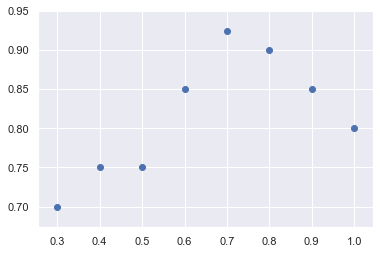

In [133]:
%matplotlib inline

y_pred = np.where(classifier.predict_proba(x_test)[:, 1] >= corresponding_max_threshold, 1, 0)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plt.scatter(plt_x, plt_y)
plt.show()

### Heatmap of the class predictions

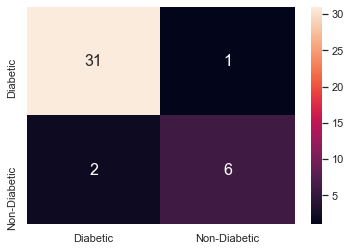

In [134]:
%matplotlib inline

labels = ['Diabetic', 'Non-Diabetic']
df_cm = pd.DataFrame(cf_matrix, labels, labels)
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size":16})
plt.show()